Importing libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

Reading the Dataset

In [3]:
df=pd.read_csv('/content/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking null values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Split the data set into test and train sets

In [9]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)

Logistic Regression

In [13]:
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       133
           1       0.71      0.36      0.47        90

    accuracy                           0.68       223
   macro avg       0.69      0.63      0.62       223
weighted avg       0.69      0.68      0.65       223



Cross Validation on Logistic Regression

In [14]:
from sklearn.model_selection import cross_val_score, KFold
model=LogisticRegression()
kf=KFold(n_splits=10)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.58888889 0.66292135 0.71910112 0.61797753 0.69662921 0.6741573
 0.70786517 0.70786517 0.74157303 0.75280899]
Average Cross Validation score :0.6869787765293383


KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(2,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

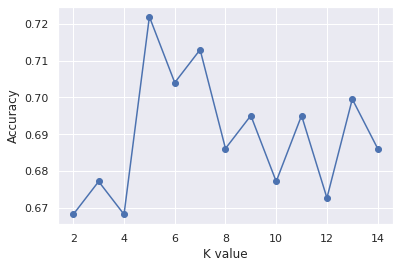

In [18]:
sns.set()
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

K value is 5.

In [19]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       133
           1       0.69      0.57      0.62        90

    accuracy                           0.72       223
   macro avg       0.71      0.70      0.70       223
weighted avg       0.72      0.72      0.72       223



Cross Validation on KNN

In [20]:
KN = KNeighborsClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(KN,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.64444444 0.60674157 0.59550562 0.60674157 0.66292135 0.75280899
 0.69662921 0.70786517 0.68539326 0.74157303]
Average Cross Validation score :0.6700624219725343


Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
RF_clf.fit(X_train,y_train)
y_pred = RF_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       133
           1       0.63      0.44      0.52        90

    accuracy                           0.67       223
   macro avg       0.66      0.64      0.64       223
weighted avg       0.67      0.67      0.66       223



Cross Validation on Random Forest

In [22]:
model = RandomForestClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.68888889 0.64044944 0.6741573  0.58426966 0.6741573  0.7752809
 0.70786517 0.76404494 0.73033708 0.74157303]
Average Cross Validation score :0.6981023720349564


Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier()
DT_clf = DT_clf.fit(X_train,y_train)
y_pred=DT_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       133
           1       0.63      0.36      0.45        90

    accuracy                           0.65       223
   macro avg       0.65      0.61      0.60       223
weighted avg       0.65      0.65      0.63       223



Cross Validation on Decision Tree

In [24]:
kf=KFold(n_splits=10)
score=cross_val_score(DT_clf,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.66666667 0.6741573  0.6741573  0.57303371 0.62921348 0.78651685
 0.65168539 0.71910112 0.75280899 0.70786517]
Average Cross Validation score :0.6835205992509363


SVM

In [25]:
from sklearn.svm import SVC
SV_model = SVC(kernel='linear', C=1, gamma='auto')
SV_model.fit(X_train,y_train)
y_pred=SV_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       133
           1       0.61      0.64      0.63        90

    accuracy                           0.69       223
   macro avg       0.68      0.68      0.68       223
weighted avg       0.69      0.69      0.69       223



Cross Validation on SVM

In [26]:
kf=KFold(n_splits=10)
score=cross_val_score(SV_model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.55555556 0.65168539 0.69662921 0.61797753 0.66292135 0.66292135
 0.69662921 0.73033708 0.75280899 0.76404494]
Average Cross Validation score :0.6791510611735331


Inference: The best accuracy is for Random Forest Classifier (69.81 %) based on the Average cross Validation Score.

Grid Search on SVM

In [27]:
parameters ={'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

In [29]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy',n_jobs=-1)
grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:  0.7169790147009314


In [30]:
model = SVC(C=1000, gamma=0.01,kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       133
           1       0.70      0.47      0.56        90

    accuracy                           0.70       223
   macro avg       0.70      0.67      0.67       223
weighted avg       0.70      0.70      0.69       223

